# NYC Airbnb Data Analysis

This dataset has information about all of the New York City Airbnbs in 2019. It was retrieved from Kaggle at this <a href="https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/">link</a>. I will first explore the data with several visualizations and then run a Linear Regression.

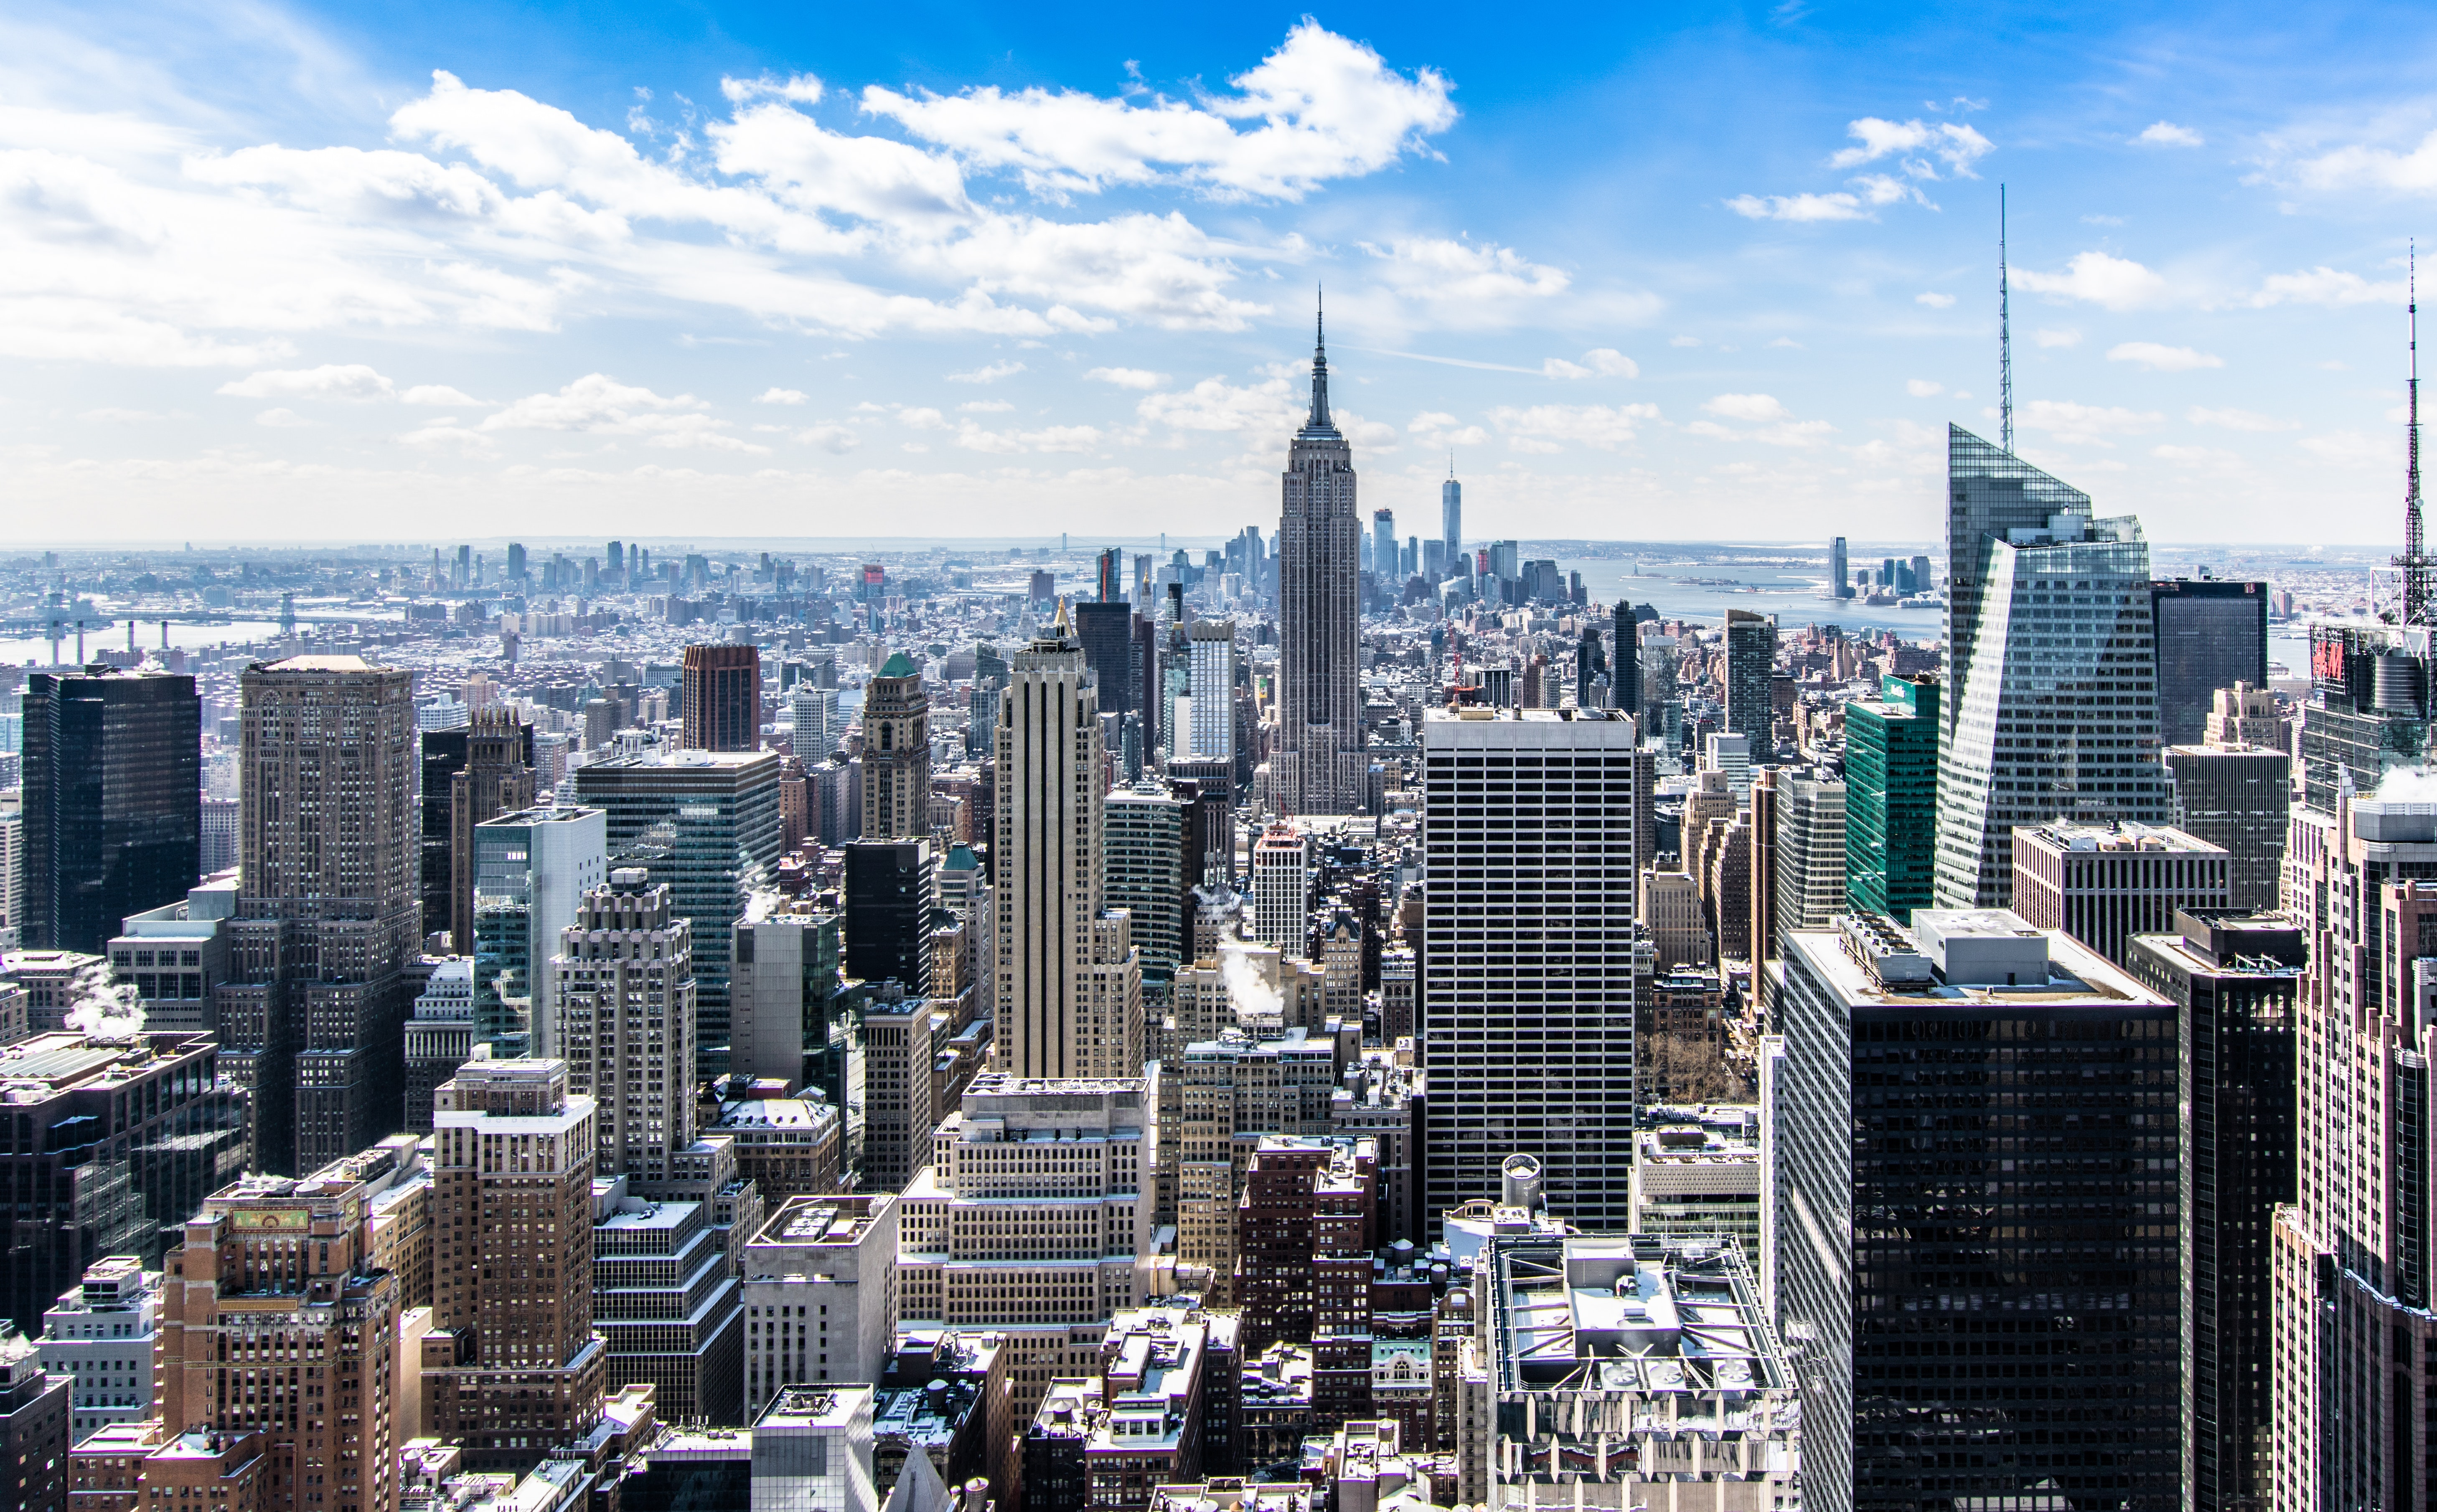

In [161]:
from IPython.display import Image
Image(filename = "nycImage.jpg", width=700, height=700)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='whitegrid',font='SimSun',palette='Spectral')

In [3]:
nyc = pd.read_csv('AB_NYC_2019.csv',index_col='id')

In [4]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(6)
memory u

From info we can see that there are missing values in a few of the columns. Below I calculated how many missing values there are in each column. These columns are not of huge interest to me so I'll deal with the missing values as necessary.

In [7]:
nyc.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
nyc.head(5)

name  host_id    host_name  \
id                                                                             
2539                Clean & quiet apt home by the park     2787         John   
2595                             Skylit Midtown Castle     2845     Jennifer   
3647               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth   
3831                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne   
5022  Entire Apt: Spacious Studio/Loft by central park     7192        Laura   

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
id                                                                             
2539            Brooklyn    Kensington  40.64749  -73.97237     Private room   
2595           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
3647           Manhattan        Harlem  40.80902  -73.94190     Private room   
3831            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
5022           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
id                                                                              
2539    149               1                  9  2018-10-19               0.21   
2595    225               1                 45  2019-05-21               0.38   
3647    150               3                  0         NaN                NaN   
3831     89               1                270  2019-07-05               4.64   
5022     80              10                  9  2018-11-19               0.10   

      calculated_host_listings_count  availability_365  
id                                                      
2539                               6               365  
2595                               2               355  
3647                               1               365  
3831                               1               194  
5022                               1                 0

In [35]:
nyc.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

# How many Airbnbs are there in Each NYC Neighbourhood?

For those of us familiar with NYC, it is unsurprising that there are the most Airbnbs in Brooklyn and Manhattan.

Text(0.5,1,'Number of Airbnbs in Each Neighbourhood Group')

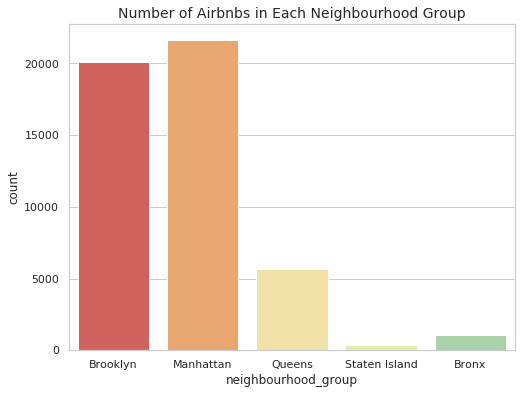

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='neighbourhood_group',data=nyc)
plt.title('Number of Airbnbs in Each Neighbourhood Group',fontsize=14)

# What is the average Airbnb price in each NYC Neighbourhood?

Manhattan has the most expensive Airbnbs on average followed by Brooklyn, Staten Island, Queens and the Bronx

Text(0.5,1,'Average Airbnb Price in Each NYC Neighbourhood')

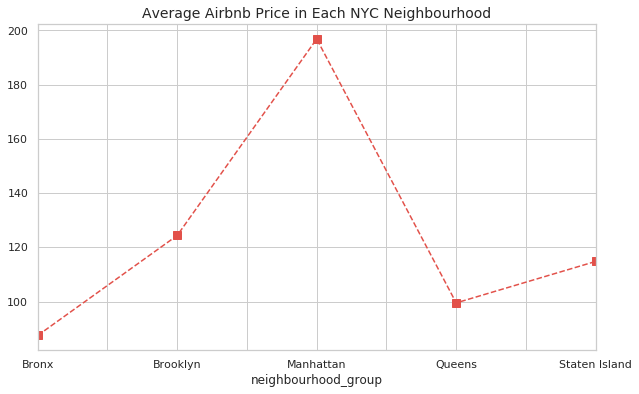

In [36]:
plt.figure(figsize=(10,6))
nyc.groupby('neighbourhood_group')['price'].mean().plot(marker='s',markersize=8,ls='--')
plt.title('Average Airbnb Price in Each NYC Neighbourhood',fontsize=14)

# How many Airbnbs of each room type are there in NYC?

The most common type of Airbnb available in NYC is an entire home/apartment followed closely by private rooms. The least common room option is a shared room.

Text(0.5,1,'Number of Airbnb Room Types')

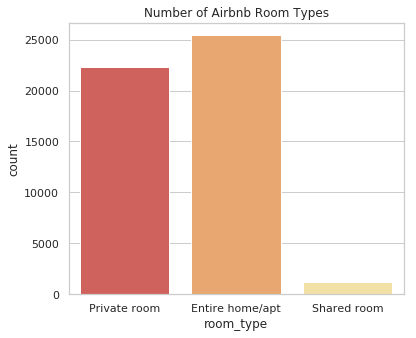

In [48]:
plt.figure(figsize=(6,5))
sns.countplot(x='room_type',data=nyc)
plt.title('Number of Airbnb Room Types')

# What is the average Airbnb price for each room type in each NYC neighbourhood?

An entire home/apartment is the most expensive Airbnb option regardless of the neighbourhood. The most expensive Airbnb, on average, is an entire home/apartment in Manhattan.

Text(0.5,1,'Average Airbnb Price for Each Room Type in Each NYC Neighbourhood')

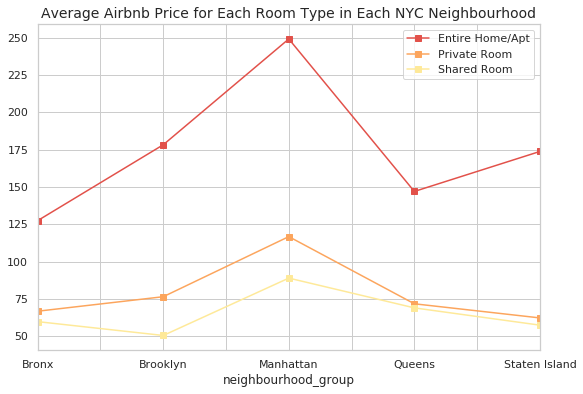

In [56]:
plt.figure(figsize=(9,6))
nyc[nyc['room_type']=='Entire home/apt'].groupby('neighbourhood_group')['price'].mean().plot(label='Entire Home/Apt',marker='s')
nyc[nyc['room_type']=='Private room'].groupby('neighbourhood_group')['price'].mean().plot(label='Private Room',marker='s')
nyc[nyc['room_type']=='Shared room'].groupby('neighbourhood_group')['price'].mean().plot(label='Shared Room',marker='s')
plt.legend()
plt.title('Average Airbnb Price for Each Room Type in Each NYC Neighbourhood',fontsize=14)

# How correlated are the variables?

Most of the variables are weakly correlatd. The only moderate correlation is between total number of reviews a listing has and the number of reviews that airbnb recieves a month. This makes sense because the more reviews an Airbnb has, the more reviews it will recieve a month.

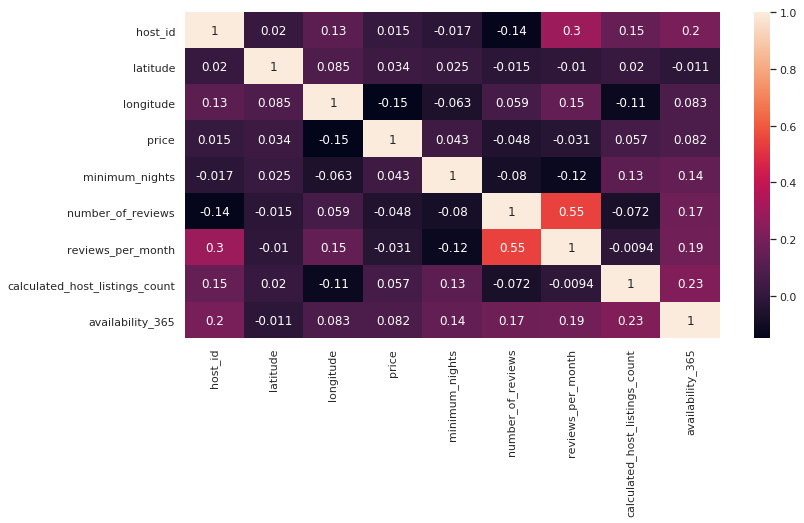

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(nyc.corr(),annot=True)

# Where are the Airbnbs in each neighbourhood located?

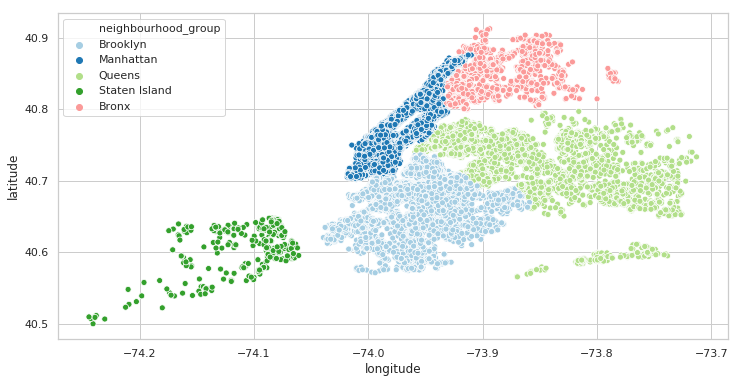

In [62]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude',y='latitude',data=nyc,hue='neighbourhood_group',palette='Paired')

# What is the distribution of room types across NYC?

There is a good distribution of private rooms and entire homes/apartments across NYC

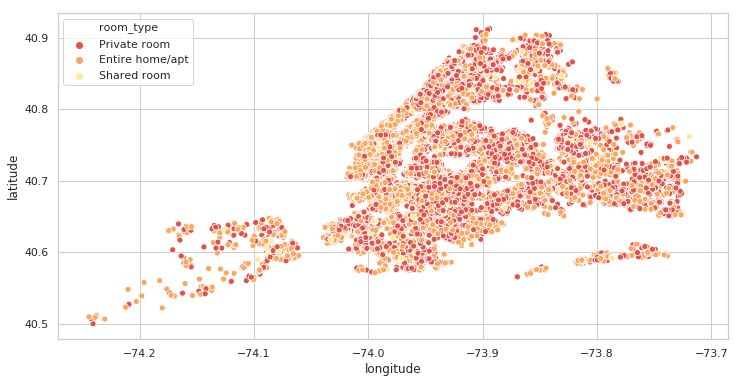

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude',y='latitude',data=nyc,hue='room_type')

# What is the distribution of Airbnbs prices across NYC?

Other than Manhattan, where most of the Airbnbs are more than 200, most Airbnbs are less than 100 

In [92]:
def priceCat(price):
    if price < 100:
        return 'less than 100'
    elif price >= 100 and price < 200:
        return 'between 100 and 200'
    else:
        return 'greater than 200'

In [94]:
nyc['Price_category'] = nyc['price'].apply(lambda price: priceCat(price))

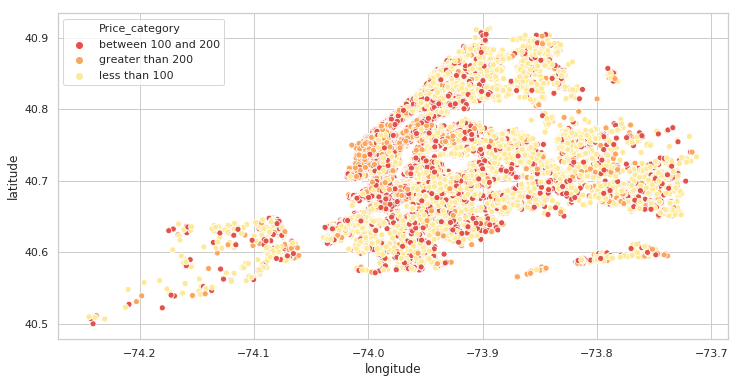

In [95]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude',y='latitude',data=nyc,hue='Price_category')

# What is the range of prices of Airbnbs in each neighbourhood?

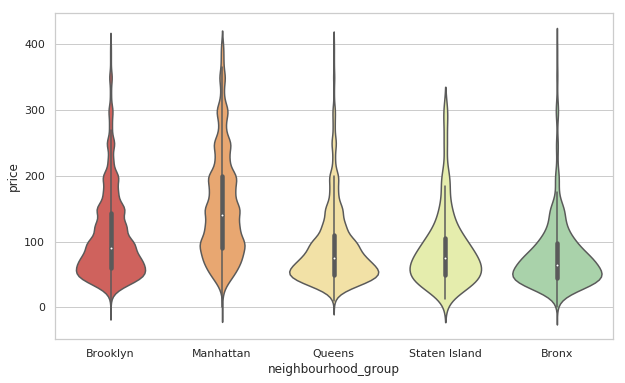

In [148]:
plt.figure(figsize=(10,6))
cutPrice = nyc[nyc['price']<400]
sns.violinplot(x='neighbourhood_group',y='price',data=cutPrice)

# Linear Regression

First I dropped columns that have missing values, have redundent information or are not of interest. I also gave the categorical columns dummy codes.

In [129]:
nyc_new = nyc.drop(['name','host_id','host_name','Price_category','last_review','reviews_per_month','neighbourhood','latitude','longitude'],axis=1)
new_neighbourhood = pd.get_dummies(nyc_new['neighbourhood_group'],drop_first=False)
new_room = pd.get_dummies(nyc_new['room_type'],drop_first=False)

In [130]:
nyc_new.drop(['neighbourhood_group','room_type'],axis=1,inplace=True)
nyc_new = pd.concat([nyc_new,new_neighbourhood,new_room],axis=1)

In [132]:
from sklearn.model_selection import train_test_split

I defined my training and testing data and fit the model

In [133]:
X = nyc_new.drop('price',axis=1)
y = nyc_new['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.35)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
linModel = LinearRegression()

In [136]:
linModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The coefficients below can be interpretted as, holding all other features fixed:
    - For every 1 night increase in the minimum night stay, the Airbnb price increases by 3 cents
    - For every 1 review, the Airbnb price decreases by 32 cents
    - For every 1 increase in the number of host listings, the Airbnb price decreases by 12 cents
    - For every 1 day the Airbnb is available throughout the year, the Airbnb price increases by 18 cents
    - If the Airbnb is located in Bronx, compared to the other neighbourhoods, the price decreases by 27 dollars
    - If the Airbnb is located in Brooklyn, compared to the other neighbourhoods, the price increases by 2 dollars
    - If the Airbnb is located in Manhattan, compared to the other neighbourhoods, the price increases by 59 dollars
    - If the Airbnb is located in Queens, compared to the other neighbourhoods, the price decreases by 16 dollars
    - If the Airbnb is located in Staten Island, compared to the other neighbourhoods, the price decreases by 17 dollars
    - If the Airbnb is an entire home/apartment, compared to the other room types, the price increases by 85 dollars
    - If the Airbnb is a private room, compared to the other room types, the price decreases by 26 dollars
    - If the Airbnb is a shared room, compared to the other room types, the price decreases by 59 dollars
    

In [137]:
coeff_df = pd.DataFrame(linModel.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
minimum_nights                     0.033463
number_of_reviews                 -0.324184
calculated_host_listings_count    -0.127186
availability_365                   0.189291
Bronx                            -27.462611
Brooklyn                           2.021190
Manhattan                         59.227798
Queens                           -16.121675
Staten Island                    -17.664702
Entire home/apt                   85.463506
Private room                     -26.347035
Shared room                      -59.116471

In [109]:
print linModel.intercept_

137.79948517648256


In [129]:
predictions = linModel.predict(X_test)

Text(0.5,1,'Distribution of Residuals')

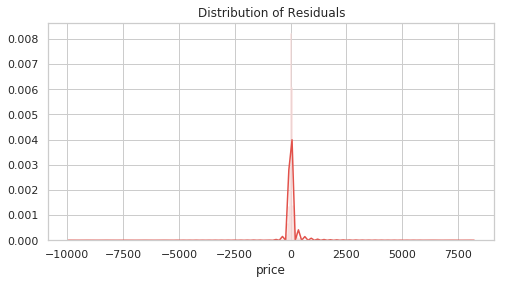

In [162]:
plt.figure(figsize=(8,4))
sns.distplot((y_test-predictions),bins=500)
plt.title('Distribution of Residuals')

In [132]:
from sklearn import metrics
print 'MAE:', metrics.mean_absolute_error(y_test, predictions)
print 'MSE:', metrics.mean_squared_error(y_test, predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))
print 'r2:', metrics.r2_score(y_test, predictions)

MAE: 74.03615448112863
MSE: 51887.81993844965
RMSE: 227.7889811611827
r2: 0.09403374835073197


In [147]:
error = pd.DataFrame({'Actual Prices':np.array(y_test),'Predicted Prices':np.array(predictions)})
error.head(5)

Actual Prices  Predicted Prices
0            110        169.963098
1             35         74.916005
2            120        226.453763
3           1700        132.644955
4            170        225.783545

Thanks for checking this out! - Brittany Corbett